In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import special as sp

In [2]:
# beta=2.0
Nc=3

In [3]:
def get_matrix( Q, lam, beta ):
    mat = np.matrix( [[sp.ive(k-ell+Q+lam[ell], beta/Nc) for ell in range(Nc)] for k in range(Nc)] )
    return mat

def cF( lam, beta ):
    res = np.linalg.det( get_matrix(0, lam, beta) )
    tmp = res
    for Q in range(1,400):
        res += np.linalg.det( get_matrix(Q, lam, beta) )
        res += np.linalg.det( get_matrix(-Q, lam, beta) )
        
        if abs(res-tmp)<1.0e-15:
            break        
        tmp = res
    return res

In [4]:
lam00 = np.zeros(Nc)
#
lam10 = np.zeros(Nc)
lam10[0] = 1
lam10[1] = 0
#
lam11 = np.zeros(Nc)
lam11[0] = 1
lam11[1] = 1
#
lam20 = np.zeros(Nc)
lam20[0] = 2
lam20[1] = 0
#
lam21 = np.zeros(Nc)
lam21[0] = 2
lam21[1] = 1
#
lam22 = np.zeros(Nc)
lam22[0] = 2
lam22[1] = 2
#
lam30 = np.zeros(Nc)
lam30[0] = 3
lam30[1] = 0
#
lam31 = np.zeros(Nc)
lam31[0] = 3
lam31[1] = 1
#
lam32 = np.zeros(Nc)
lam32[0] = 3
lam32[1] = 2
#
lam33 = np.zeros(Nc)
lam33[0] = 3
lam33[1] = 3

In [5]:
retrU = np.loadtxt( "obs/retrU.dat" )

In [6]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [cF( lam10, beta )/cF( lam00, beta ) for beta in xx ] )
yy[0] = 0.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

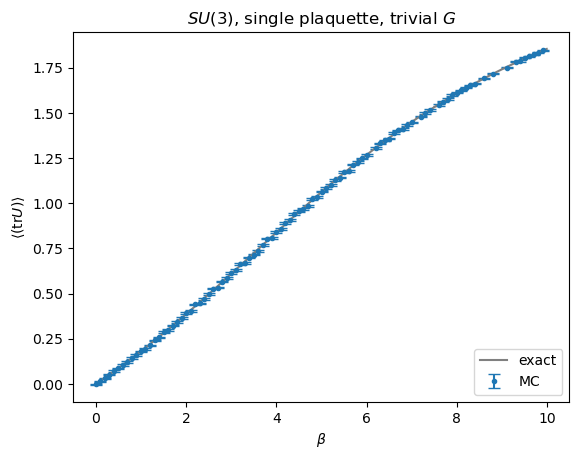

In [7]:
plt.errorbar( retrU.T[0], retrU.T[1], retrU.T[2], 
             ls='none', marker='.',
            capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U) \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [8]:
obs = np.loadtxt( "obs/retrUsq.dat" )

In [9]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [(cF(lam20,beta)+cF(lam11,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 0.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

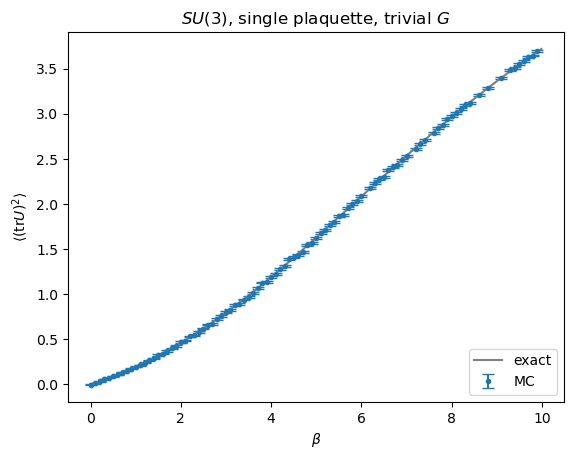

In [10]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
            capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)^2 \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [11]:
obs = np.loadtxt( "obs/retrUtrUdag.dat" )

In [12]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [1.0+(cF(lam21,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 1.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

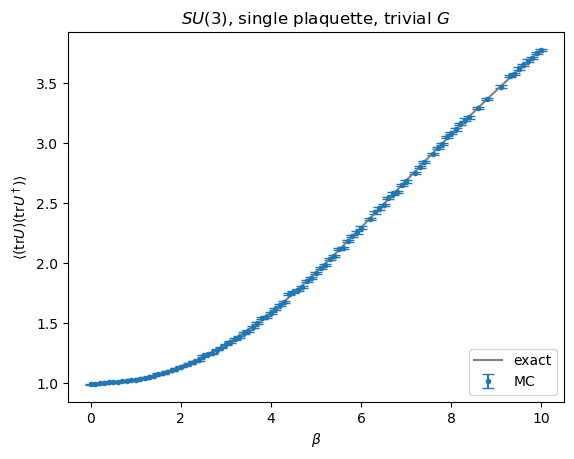

In [13]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)({\\rm tr} U^\\dagger) \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [14]:
obs = np.loadtxt( "obs/retrUcub.dat" )

In [15]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [1.0+(cF(lam30,beta)+2.0*cF(lam21,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 1.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

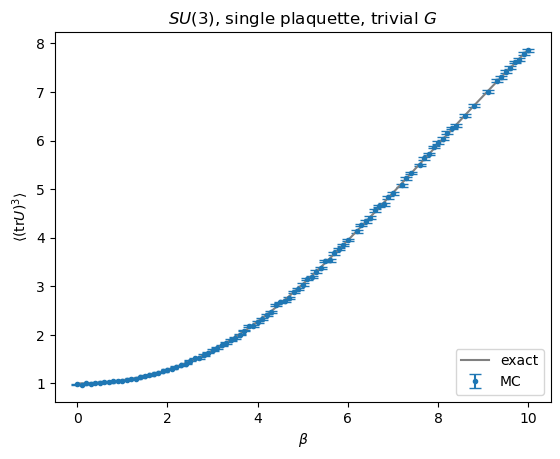

In [16]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)^3 \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")

In [17]:
obs = np.loadtxt( "obs/retrUsqtrUdag.dat" )

In [18]:
xx = np.arange( 0.0, 10.0, 0.01 )
yy = np.array( [(cF(lam31,beta)+cF(lam22,beta)+2.0*cF(lam10,beta))/cF(lam00,beta) for beta in xx ] )
yy[0] = 0.0

Text(0.5, 1.0, '$SU(3)$, single plaquette, trivial $G$')

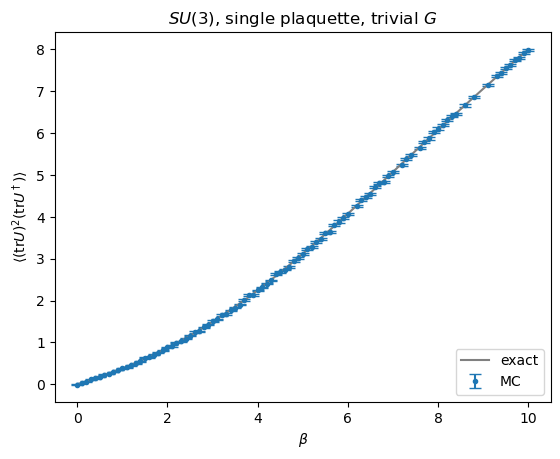

In [19]:
plt.errorbar( obs.T[0], obs.T[1], obs.T[2], 
             ls='none', marker='.',
             capsize=4.0, label="MC")

plt.plot( xx, yy, label="exact", c='gray' )

plt.xlabel("$\\beta$")
plt.ylabel("$\\langle ({\\rm tr} U)^2({\\rm tr} U^\\dagger) \\rangle$")
plt.legend(loc="lower right")
plt.title("$SU(3)$, single plaquette, trivial $G$")